In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_loc = 'data/loan_data_training.csv'
all_data = pd.read_csv(data_loc)

In [3]:
print('%i records in data set' % len(all_data))
all_data.head(2)

614 records in data set


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## Clean data

In [4]:
data_df = all_data.copy()

In [5]:
data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
columns_with_nan_values = data_df.columns[data_df.isna().any()].tolist()
print('%i columns have NaN values' % (len(columns_with_nan_values)))
print(columns_with_nan_values)

7 columns have NaN values
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [7]:
data_df['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [8]:
data_df['Gender'] = data_df['Gender'].fillna('Not specified')
data_df['Gender'].value_counts(dropna=False)

Male             489
Female           112
Not specified     13
Name: Gender, dtype: int64

In [9]:
data_df['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [10]:
data_df['Married'] = data_df['Married'].fillna(data_df.mode()['Married'][0])
data_df['Married'].value_counts(dropna=False)

Yes    401
No     213
Name: Married, dtype: int64

In [11]:
data_df['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [12]:
data_df['Dependents'] = data_df['Dependents'].fillna('Not specified')
data_df['Dependents'].value_counts(dropna=False)

0                345
1                102
2                101
3+                51
Not specified     15
Name: Dependents, dtype: int64

In [13]:
data_df['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [14]:
temp_df = data_df[data_df['Self_Employed'].isnull()]
temp_df['Loan_Status'].value_counts(dropna=False)

Y    23
N     9
Name: Loan_Status, dtype: int64

In [15]:
data_df['Self_Employed'] = data_df['Self_Employed'].fillna('Not specified')
data_df['Self_Employed'].value_counts(dropna=False)

No               500
Yes               82
Not specified     32
Name: Self_Employed, dtype: int64

In [16]:
data_df['LoanAmount'].value_counts(dropna=False)

NaN       22
 120.0    20
 110.0    17
 100.0    15
 160.0    12
 187.0    12
 128.0    11
 113.0    11
 130.0    10
 96.0      9
 95.0      9
 115.0     8
 112.0     8
 70.0      8
 150.0     7
 125.0     7
 136.0     7
 132.0     7
 104.0     7
 135.0     7
 116.0     6
 81.0      6
 175.0     6
 180.0     6
 144.0     6
 80.0      6
 155.0     6
 90.0      6
 158.0     6
 138.0     6
          ..
 54.0      1
 436.0     1
 250.0     1
 304.0     1
 280.0     1
 42.0      1
 72.0      1
 240.0     1
 214.0     1
 59.0      1
 308.0     1
 236.0     1
 380.0     1
 296.0     1
 208.0     1
 119.0     1
 500.0     1
 246.0     1
 234.0     1
 86.0      1
 230.0     1
 190.0     1
 178.0     1
 218.0     1
 62.0      1
 360.0     1
 53.0      1
 65.0      1
 156.0     1
 89.0      1
Name: LoanAmount, Length: 204, dtype: int64

In [17]:
data_df['LoanAmount'] = data_df['LoanAmount'].fillna(data_df.mean()['LoanAmount'])
data_df['LoanAmount'].value_counts(dropna=False)

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
187.000000    12
113.000000    11
128.000000    11
130.000000    10
96.000000      9
95.000000      9
70.000000      8
115.000000     8
112.000000     8
135.000000     7
150.000000     7
136.000000     7
132.000000     7
125.000000     7
104.000000     7
80.000000      6
81.000000      6
138.000000     6
90.000000      6
158.000000     6
116.000000     6
175.000000     6
144.000000     6
155.000000     6
180.000000     6
              ..
315.000000     1
101.000000     1
73.000000      1
142.000000     1
48.000000      1
164.000000     1
83.000000      1
191.000000     1
166.000000     1
495.000000     1
59.000000      1
214.000000     1
240.000000     1
72.000000      1
42.000000      1
349.000000     1
280.000000     1
405.000000     1
279.000000     1
304.000000     1
650.000000     1
436.000000     1
78.000000      1
54.000000      1
89.000000      1
570.000000     1
300.000000     1
376.000000    

In [18]:
data_df['Loan_Amount_Term'].value_counts(dropna=False)

 360.0    512
 180.0     44
 480.0     15
NaN        14
 300.0     13
 84.0       4
 240.0      4
 120.0      3
 36.0       2
 60.0       2
 12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
data_df['Loan_Amount_Term'] = data_df['Loan_Amount_Term'].fillna(data_df.mode()['Loan_Amount_Term'][0])
data_df['Loan_Amount_Term'].value_counts(dropna=False)

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
data_df['Credit_History'].value_counts(dropna=False)

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64

In [21]:
temp_df = data_df[data_df['Credit_History'].isnull()]
temp_df['Loan_Status'].value_counts(dropna=False, normalize=True)

Y    0.74
N    0.26
Name: Loan_Status, dtype: float64

In [22]:
data_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [23]:
data_df['Credit_History'] = data_df['Credit_History'].fillna(data_df.mode()['Credit_History'][0])
data_df['Credit_History'].value_counts(dropna=False)

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [24]:
columns_with_nan_values = data_df.columns[data_df.isna().any()].tolist()
print('%i columns have NaN values' % (len(columns_with_nan_values)))
print(columns_with_nan_values)

0 columns have NaN values
[]


In [25]:
data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
from sklearn.preprocessing import LabelEncoder

list_of_columns_to_encode = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area',
    'Credit_History',
    'Loan_Status'
]

le = LabelEncoder()

for column in list_of_columns_to_encode:
    data_df[column] = le.fit_transform(data_df[column])

data_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0


In [35]:
data_df['Total_Income'] = data_df['ApplicantIncome'] + data_df['CoapplicantIncome']
data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0
2,LP001005,1,1,0,0,2,3000,0.0,66.000000,360.0,1,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0


In [34]:
data_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.000000,0.346352,0.149674,0.024382,0.008899,0.094472,0.073308,0.136081,-0.068522,-0.003844,-0.030903,0.008690,0.122572
Married,0.346352,1.000000,0.315849,0.012304,-0.009864,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478,0.083319
Dependents,0.149674,0.315849,1.000000,0.060466,0.039636,0.103416,0.011146,0.130722,-0.075159,-0.082888,0.032600,-0.007318,0.102868
Education,0.024382,0.012304,0.060466,1.000000,-0.015722,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884,-0.161362
Self_Employed,0.008899,-0.009864,0.039636,-0.015722,1.000000,0.129957,0.008240,0.118970,-0.038692,0.022669,-0.027783,0.001463,0.126656
ApplicantIncome,0.094472,0.051708,0.103416,-0.140760,0.129957,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710,0.893037
CoapplicantIncome,0.073308,0.075948,0.011146,-0.062290,0.008240,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187,0.342781
LoanAmount,0.136081,0.147141,0.130722,-0.166998,0.118970,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.068522,-0.100912,-0.075159,-0.073928,-0.038692,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549,-0.070917
Credit_History,-0.003844,0.010938,-0.082888,-0.073658,0.022669,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556,-0.012563


## Build prediction models

In [43]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [66]:
features_for_analysis = [
    'Gender',
     'Married',
     'Dependents',
#     'Education',
#     'Self_Employed',
#     'ApplicantIncome',
#     'CoapplicantIncome',
    'Total_Income',
    'LoanAmount',
#     'Loan_Amount_Term',
    'Property_Area',
    'Credit_History',
]

features = data_df[features_for_analysis]
loan_status = data_df['Loan_Status']

train_data, test_data, train_labels, test_labels = train_test_split(features, loan_status, test_size=0.25, random_state=25)

In [67]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_data)
train_data_minmax = minmax_scaler.transform(train_data)
test_data_minmax = minmax_scaler.transform(test_data)

In [68]:
# create list to store data about the performance of each model
results = []

# create list of models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

# iterate through list of models and run cross validation 10 times and store accuracy values
for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data_minmax, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.4f (+/- %0.4f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

Accuracy of SVC: 0.8109 (+/- 0.0506)
Accuracy of DecisionTreeClassifier: 0.6717 (+/- 0.0471)
Accuracy of KNeighborsClassifier: 0.7978 (+/- 0.0446)
Accuracy of RandomForestClassifier: 0.7717 (+/- 0.0543)
Accuracy of GradientBoostingClassifier: 0.7804 (+/- 0.0554)
Accuracy of GaussianNB: 0.8022 (+/- 0.0519)
Accuracy of LogisticRegression: 0.8109 (+/- 0.0506)


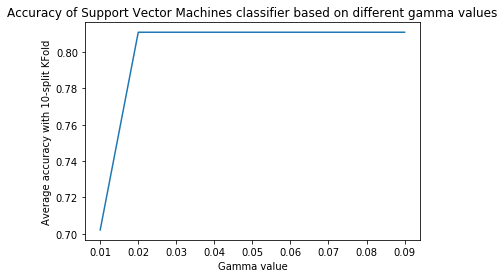

{'gamma': 0.02, 'accuracy': 0.81086956521739117}


In [69]:
# generate plot showing SVC Classifier score based on different gamma values 
# and print out gamma value that results in highest score

average_accuracy_scores = []

highest_accuracy = {
    'gamma': 0,
    'accuracy': 0
}

gamma_values = np.arange(0.01, 0.1, 0.01)

for val in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=val)
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(svc_classifier, train_data_minmax, train_labels, cv=kfold, scoring='accuracy')
    accuracy_score = cross_val_results.mean()
    average_accuracy_scores.append(accuracy_score)
    if accuracy_score > highest_accuracy['accuracy']:
        highest_accuracy = {
            'gamma': val,
            'accuracy': accuracy_score
        }

x_values = gamma_values

y_values = average_accuracy_scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier based on different gamma values')
plt.ylabel('Average accuracy with 10-split KFold')
plt.xlabel('Gamma value')
plt.show()
print(highest_accuracy)

In [ ]:
svc_classifier = SVC(kernel='rbf', gamma=0.02)
svc_classifier.fit(train_data_minmax, train_labels)

pred_test = model.predict(test)